# Proyecto
## Experimento #02
### Estimar tamaño de un campo de grama

- **Nombre:** Ernesto Menendez
- **Carnet:** 20072392


### Descripción

Este experimento en consiste estimar el tamaño del campo de grama usando el tamaño de los tallos en una imagen dada.
Luego, podemos usar esta estimación y combinar con los resultados del experimento #01 para inferir la cantidad de
hojas de grama en un campo de golf.

### Librerias

In [96]:
from util import read_jpg, plt_show, as_grayscale

import numpy as np
import cv2

### Imagen original

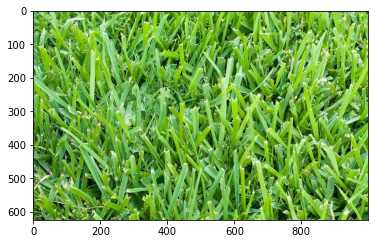

In [97]:
img = read_jpg("grama1")
plt_show(img)

### Pre-procesamiento de la imagen

#### Suavizado y binarización

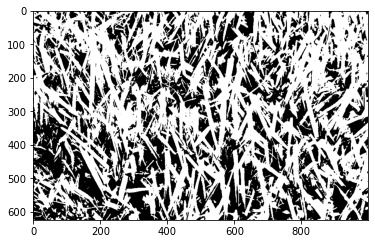

In [98]:
blur = cv2.GaussianBlur(img, (3, 3), 0)
gray = as_grayscale(blur)
ret, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt_show(otsu)

#### Erosión y dilatación

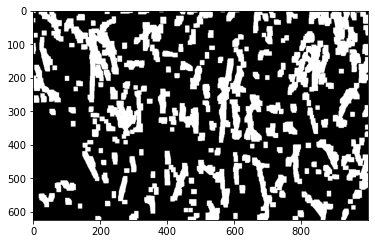

In [99]:
morph_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
eroded = cv2.erode(otsu, morph_kernel, iterations=3)
dilated = cv2.dilate(eroded, morph_kernel, iterations=3)
plt_show(dilated)

#### Encontrar contornos

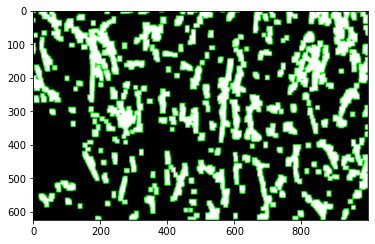

In [100]:
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
bgr_dilated = cv2.cvtColor(dilated, cv2.COLOR_GRAY2BGR)
dilated_contours = cv2.drawContours(bgr_dilated, contours, -1, (0, 255, 0), thickness=2)
plt_show(dilated_contours)

#### Usar contornos para encontrar rectángulos de área mínima

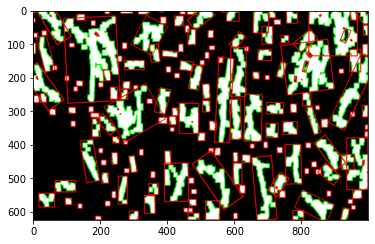

In [101]:
rects = []
for contour in contours:
    box = cv2.boxPoints(cv2.minAreaRect(contour))
    box = np.int32(box)
    rects.append(box)
    dilated_contours = cv2.drawContours(dilated_contours, [box], 0, (0,0,255), 2)

plt_show(dilated_contours)

#### Aislar los rectangulos que mejor representen las hojas de grama

In [102]:
# TODO

### Estimar tamaño del campo de grama de la imagen

In [103]:
# TODO